In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [99]:
puppy_train= pd.read_csv("train.csv")
puppy_test= pd.read_csv("test.csv")

In [ ]:
#puppy_train.info()
puppy_dog = puppy_train.mask(puppy_train["Type"]==2)
puppy_cat = puppy_train.mask(puppy_train["Type"]==1)

In [100]:
puppy_train["AdoptionSpeed"] = puppy_train["AdoptionSpeed"].replace({1: 0, 2: 0, 3:1,4:2 })
#puppy_test["AdoptionSpeed"] = puppy_test["AdoptionSpeed"].replace({1: 0, 2: 0, 3:1,4:2 })

In [58]:
def reasign(dataframe, column_name,dictionaryregex=None,dictionary=None):
    if dictionaryregex!=None:
        for value_to_check in dictionaryregex.keys():   
            dataframe[column_name] = dataframe[column_name].replace(to_replace = value_to_check, value = dictionaryregex.get(value_to_check), regex = True)
    if dictionary !=None:
        for value_to_check in dictionary.keys():   
            dataframe[column_name] = dataframe[column_name].replace(to_replace = value_to_check, value = dictionary.get(value_to_check), regex = False)
    #dataframe.Name.str.replace("(?:\w)No Name","No Name")

In [59]:
resc =  puppy_train["RescuerID"].value_counts()
resctest =  puppy_test["RescuerID"].value_counts()

In [60]:
dict_rescuer = resc.to_dict()
dict_rescuertest = resctest.to_dict()

In [61]:
reasign(puppy_test,"RescuerID",dictionary=dict_rescuertest)

In [62]:
reasign(puppy_train,"RescuerID",dictionary=dict_rescuer)

In [63]:
puppy_train.loc[puppy_train["RescuerID"]<11,"RescuerID"]=0
puppy_train.loc[puppy_train["RescuerID"]>10,"RescuerID"]="Organization"
puppy_train.loc[puppy_train["RescuerID"]==0,"RescuerID"]="Individual"

In [64]:
puppy_test.loc[puppy_test["RescuerID"]<11,"RescuerID"]=0
puppy_test.loc[puppy_test["RescuerID"]>10,"RescuerID"]="Organization"
puppy_test.loc[puppy_test["RescuerID"]==0,"RescuerID"]="Individual"

In [65]:
puppy_train.loc[puppy_train["RescuerID"]=="Organization","Organization"]=1
puppy_train.loc[puppy_train["RescuerID"]=="Individual","Organization"]=0
puppy_train = puppy_train.drop("RescuerID",axis=1)

In [ ]:
puppy_test.loc[puppy_test["RescuerID"]=="Organization","Organization"]=1
puppy_test.loc[puppy_test["RescuerID"]=="Individual","Organization"]=0
puppy_test = puppy_test.drop("RescuerID",axis=1)

In [ ]:
puppy_test

In [66]:
puppy_train= puppy_train.drop(["PetID"],axis=1)
puppy_test= puppy_test.drop(["PetID"],axis=1)

In [67]:
puppy_train= puppy_train.loc[puppy_train.index.repeat(puppy_train.Quantity)]
puppy_test= puppy_test.loc[puppy_test.index.repeat(puppy_test.Quantity)]
puppy_train= puppy_train.drop("Quantity",axis=1)
puppy_test= puppy_test.drop("Quantity",axis=1)

In [ ]:
puppy_train.info()

In [ ]:
plt.figure(figsize=(15,10), dpi= 80)
sns.heatmap(puppy_train.corr(), xticklabels=puppy_train.corr().columns, yticklabels=puppy_train.corr().columns,cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of cub features ', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(15,10), dpi= 80)
sns.heatmap(puppy_test.corr(), xticklabels=puppy_test.corr().columns, yticklabels=puppy_test.corr().columns,cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of cub features ', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
puppy_train.isna().sum()

In [68]:
puppy_train["Name"]=puppy_train["Name"].fillna("No Name")
puppy_test["Name"]=puppy_test["Name"].fillna("No Name")

In [69]:
puppy_train["Description"]=puppy_train["Description"].fillna(0)
puppy_test["Description"]=puppy_test["Description"].fillna(0)

In [ ]:
#function identifies names that are actually meaningless and changes to "No Name"


In [70]:
#dictionary of regex and not regex to identify meaningless names
import re 
name_dict = {'[Kk][Ii][Tt][Tt](\w)*':'No Name',
             'NaN':"No Name",
            '[Pp][Uu][Pp](\w)*':'No Name',
            '(?:\D|\d)*[Nn][Oo]\s[Nn][Aa][Mm][Ee](?:\D|\d)*':'No Name',
            '!':'No Name',
            '\d\d':"No Name",
            '\w\d':"No Name",
            '[Pp][Ee][Tt][Ss]':"No Name",
            '[Uu][Rr][Gg][Ee][Nn][Tt]': 'No Name',
            '[Dd][Oo][Gg]': 'No Name',
            '[Dd][Ii][Ee]': 'No Name',
            'Girl': 'No Name',
            '[Cc][Aa][Tt]': "No Name",
            'Boy': 'No Name',
            'Female': 'No Name'}
name_dict2={}
exception = puppy_train[puppy_train['Name'].apply(lambda x: len(str(x))) < 3]['Name'].unique()
for e in exception:
    name_dict2[e]="No Name"

reasign(puppy_train, "Name", name_dict,name_dict2)

In [71]:
reasign(puppy_test, "Name", name_dict,name_dict2)

In [ ]:
#imports wordcloud library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#creates wordcloud of most popular names divide by cats and dogs
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(puppy_train.loc[puppy_train['Type'] == 2, 'Name'].fillna('').values)
text_cat = text_cat.replace("No Name", "")
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(puppy_train.loc[puppy_train['Type'] == 1, 'Name'].fillna('').values)
text_dog = text_dog.replace("No Name", "")
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [72]:
puppy_train.loc[puppy_train["Name"]=="No Name","NameBi"]=0
puppy_train.loc[puppy_train["Name"]!="No Name","NameBi"]=1

In [ ]:
sns.set(style="whitegrid")

sns.countplot(x="Type", hue="AdoptionSpeed", data=puppy_train)

In [ ]:
sns.set(style="whitegrid")

sns.countplot(x="NameBi", hue="AdoptionSpeed", data=puppy_train)

In [ ]:
puppy_train= puppy_train.drop("NameBi",axis=1)
puppy_test= puppy_test.drop("NameBi",axis=1)


In [73]:
puppy_train = puppy_train.drop("Name",axis=1)
puppy_test = puppy_test.drop("Name",axis=1)
#mantendo apenas a feature resultante "NameBi"

In [111]:
bins = pd.IntervalIndex.from_tuples([(0, 3), (4, 12), (13, 256)])
puppy_train["Age"]=pd.cut(puppy_train["Age"],bins = bins,labels=["Baby","Cub","Adult"])
puppy_test["Age"]=pd.cut(puppy_test["Age"],bins = bins,labels=["Baby","Cub","Adult"])

In [114]:
puppy_train.loc[puppy_train["AdoptionSpeed"]==2]["Age"].value_counts()

(0, 3]       1432
(4, 12]      1273
(13, 256]    1089
Name: Age, dtype: int64

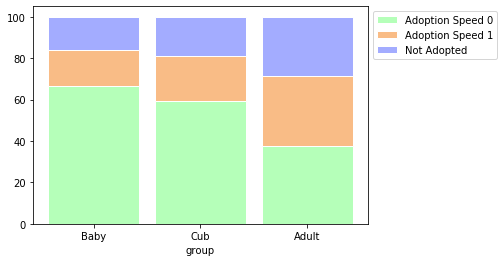

In [115]:
from matplotlib import rc
r = [0,1,2]
df = pd.DataFrame(np.array([[4589, 1227, 1099], [1752, 650, 554], [1432,1273 , 1089]]),columns=['Baby', 'Cub', 'Adult'])
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['Baby'], df['Cub'], df['Adult'])]
greenBars = [i / j * 100 for i,j in zip(df['Baby'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['Cub'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['Adult'], totals)]
 
#plot
barWidth = 0.85
names = ('Baby','Cub','Adult')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Adoption Speed 0")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Adoption Speed 1")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Not Adopted")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 

#Show graphic
plt.show()


In [ ]:
sns.countplot(x="AdoptionSpeed", hue="Age", data=puppy_train, palette="muted")

In [ ]:
age_dummy = pd.get_dummies(puppy_train['Age'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Age",axis=1,inplace=True)

In [74]:
puppy_test["DescriptionLenght"]=puppy_test["Description"].str.len()
puppy_test = puppy_test.drop("Description",axis=1)

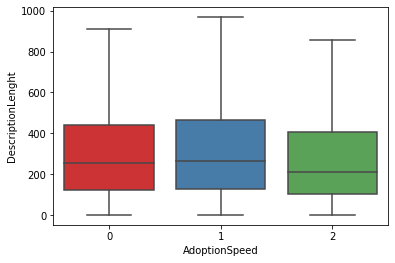

In [75]:
puppy_train["DescriptionLenght"]=puppy_train["Description"].str.len()
puppy_train = puppy_train.drop("Description",axis=1)
sns.boxplot(x="AdoptionSpeed", y="DescriptionLenght", data=puppy_train,palette='Set1',showfliers=False)
plt.y_lim=2000


In [ ]:
sns.countplot(x="AdoptionSpeed", hue="Health", data=puppy_train, palette="muted")

In [ ]:
puppy_train


In [76]:
breed=pd.read_csv("breed_labels.csv")
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [77]:
dict_breed = pd.Series(breed.BreedName.values,index=breed.BreedID).to_dict()

In [78]:
dict_breed[0]="Unknown"

In [79]:
reasign(puppy_train, "Breed1", dict_breed)

In [80]:
reasign(puppy_train, "Breed2",dict_breed)

In [ ]:
fig, ax = plt.subplots(figsize = (20, 18))
plt.subplot(2, 2, 1)
text_cat1 = ' '.join(puppy_train.loc[puppy_train['Type'] == 2, 'Breed1'].fillna('').values)
text_cat1 = text_cat1.replace("Hair", "") 

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_cat1)
plt.imshow(wordcloud)
plt.title('Top cat breed1')
plt.axis("off")

plt.subplot(2, 2, 2)
text_dog1 = ' '.join(puppy_train.loc[puppy_train['Type'] == 1, 'Breed1'].fillna('').values)
text_dog1 = text_dog1.replace("Breed", "")
text_dog1 = text_dog1.replace("Mixed", "")
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_dog1)
plt.imshow(wordcloud)
plt.title('Top dog breed1')
plt.axis("off")

plt.subplot(2, 2, 3)
text_cat2 = ' '.join(puppy_train.loc[puppy_train['Type'] == 2, 'Breed2'].fillna('').values)
text_cat2 = text_cat2.replace("Unknown", "")
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_cat2)
plt.imshow(wordcloud)
plt.title('Top cat breed1')
plt.axis("off")

plt.subplot(2, 2, 4)
text_dog2 = ' '.join(puppy_train.loc[puppy_train['Type'] == 1, 'Breed2'].fillna('').values)
text_dog2 = text_dog2.replace("Unknown", "")
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_dog2)
plt.imshow(wordcloud)
plt.title('Top dog breed2')
plt.axis("off")
plt.show()

In [81]:
def types(x):
    try:
        if x['Breed1'] > x['Breed2']:
            y = x['Breed2']+ '-' + x['Breed1']
        elif x['Breed1'] == x['Breed2']:
            y = x['Breed1']
        else :
            y = x['Breed1']+ '-' + x['Breed2']
    except:
        y = x['Breed1']
    return y
puppy_train['Breed'] = puppy_train.apply(types, axis=1)

In [82]:
puppy_train.loc[puppy_train["Breed"]==0,"Breed"]="Unknown"

In [83]:
puppy_train = puppy_train.drop(["Breed1","Breed2"],axis=1)

In [ ]:
breed = pd.get_dummies(puppy_train['Breed'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Breed",axis=1,inplace=True)

In [108]:
r = [0,1,2,3,4,5,6]
raw_data = {'greenBars': [3707, 1764, 525, 298, 492,380,371], 'orangeBars': [1633, 854, 184, 145, 185,133,125],'blueBars': [2087, 1132,238, 191, 207, 171, 171]}
df = pd.DataFrame(raw_data)
            
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 

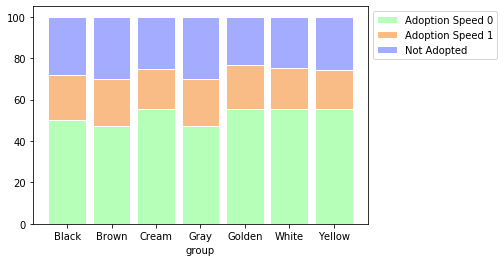

In [109]:
from matplotlib import rc
#plot
barWidth = 0.85
names = ('Black','Brown','Cream', "Gray", "Golden", "White", "Yellow")
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Adoption Speed 0")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Adoption Speed 1")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Not Adopted")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 

#Show graphic
plt.show()

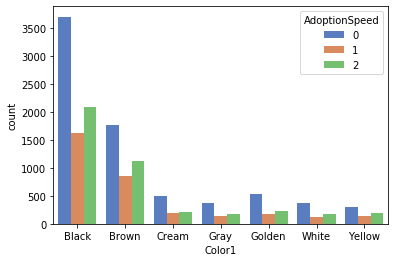

In [42]:
sns.countplot(x="Color1", hue="AdoptionSpeed", data=puppy_train, palette="muted")

In [104]:
puppy_train.loc[puppy_train["AdoptionSpeed"]==2]["Color1"].value_counts()

1    2087
2    1132
3     238
5     207
4     191
7     171
6     171
Name: Color1, dtype: int64

In [84]:
colors={1: 'Black',
  2: 'Brown',
  3: 'Golden',
  4: 'Yellow',
  5: 'Cream',
  6: 'Gray',
  7: 'White'}


In [85]:
reasign(puppy_train,"Color1",dictionary=colors)
reasign(puppy_train,"Color2",dictionary=colors)
reasign(puppy_train,"Color3",dictionary=colors)

In [86]:
puppy_train["Color3"].value_counts()

0         13918
White      7086
Cream       958
Gray        862
Yellow      444
Golden      362
Name: Color3, dtype: int64

In [87]:
def color_func(x):
    if x["Color3"]==0:
        try:
            if x['Color1'] > x['Color2']:
                y = x['Color2']+ '-' + x['Color1']
            elif x['Color1'] == x['Color2']:
                y = x['Color1']
            else :
                y = x['Color1']+ '-' + x['Color2']
        except:
            y = x['Color1']
    else:
        y = x["Color1"]+ "-" + x["Color2"] + "-" + x["Color3"]
    return y

In [90]:
puppy_train['Color'] = puppy_train.apply(color_func, axis=1)

In [91]:
color_train = puppy_train['Color']
color_test = puppy_test['Color']

KeyError: 'Color'

In [92]:
puppy_train = puppy_train.drop(["Color1","Color2","Color3"],axis=1)

In [ ]:
color_dummy = pd.get_dummies(puppy_train['Color'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Color",axis=1,inplace=True)


In [ ]:
puppy_train.loc[(puppy_train["Dewormed"]==2)&(puppy_train["Vaccinated"]==2)&(puppy_train["Sterilized"]==1)]

In [ ]:
gender={1 : "Male",
        2 : "Female",
        3 : "Mixed"}
reasign(puppy_train,"Gender",dictionary=gender)

In [ ]:
gender_dummy = pd.get_dummies(puppy_train['Gender'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Gender",axis=1,inplace=True)

In [ ]:
vaccinated ={1 : "Yes",
         2 : "No",
         3 : "Unknown"}
reasign(puppy_train,"Vaccinated",dictionary=vaccinated)

In [ ]:
vaccinated_dummy = pd.get_dummies(puppy_train['Vaccinated'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Vaccinated",axis=1,inplace=True)



In [ ]:
dewormed={1 : "Male",
        2 : "Female",
        3 : "Mixed"}
reasign(puppy_train,"Dewormed",dictionary=dewormed)

In [ ]:
dewormed_dummy = pd.get_dummies(puppy_train['Dewormed'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Dewormed",axis=1,inplace=True)



In [ ]:
sterilized={1 : "Yes",
        2 : "No",
        3 : "Unknown"}
reasign(puppy_train,"Sterilized",dictionary=sterilized)

In [ ]:
sterilized_dummy = pd.get_dummies(puppy_train['Sterilized'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Sterilized",axis=1,inplace=True)



In [ ]:
health={1 : "Healthy", 
        2 : "Minor Injury",
        3 : "Serious Injury",
        0 : "Not Specified"}
reasign(puppy_train,"Health",dictionary=gender)

In [ ]:
health_dummy = pd.get_dummies(puppy_train['Health'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Health",axis=1,inplace=True)



In [ ]:
types={1 : "Dog",
        2 : "Cat"}
reasign(puppy_train,"Type",dictionary=types)

In [ ]:
type_dummy = pd.get_dummies(puppy_train['Type'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("Type",axis=1,inplace=True)

In [ ]:
size={1 : "Small",
      2 : "Medium",
      3 : "Large",
      4 : "Extra Large",
      0 : "Not Specified"}
reasign(puppy_train,"MaturitySize",dictionary=size)

In [ ]:
size_dummy = pd.get_dummies(puppy_train['MaturitySize'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("MaturitySize",axis=1,inplace=True)

In [ ]:
fur={1 : "Small",
      2 : "Medium",
      3 : "Large",
      4 : "Extra Large",
      0 : "Not Specified"}
reasign(puppy_train,"FurLength",dictionary=fur)

In [ ]:
fur_dummy = pd.get_dummies(puppy_train['FurLength'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade

puppy_train.drop("FurLength",axis=1,inplace=True)

In [ ]:
puppy_train.info()

In [53]:
puppy_train["Fee"].value_counts()

0      12663
1        942
50       468
100      408
20       136
30       103
10        70
80        66
5         24
15        20
40        19
70        13
60        11
25         8
90         8
8          7
9          5
38         4
35         3
59         2
65         2
88         2
45         2
72         1
48         1
99         1
75         1
2          1
14         1
89         1
Name: Fee, dtype: int64

In [93]:
puppy_train.loc[puppy_train["Fee"]<101,"Fee"]=0
puppy_train.loc[puppy_train["Fee"]>100,"Fee"]=1


puppy_test.loc[puppy_test["Fee"]<101,"Fee"]=0
puppy_test.loc[puppy_test["Fee"]>100,"Fee"]=1

In [ ]:
sns.countplot("Type",data=puppy_train,hue="AdoptionSpeed")

In [ ]:
sns.boxplot(x="AdoptionSpeed", y="PhotoAmt", data=puppy_train,palette='Set1',showfliers=False)

In [ ]:
puppy_train["VideoAmt"].value_counts()

In [ ]:
puppy_train["VideoAmt"].loc[puppy_train["AdoptionSpeed"]==0].value_counts()
puppy_train["VideoAmt"].loc[puppy_train["AdoptionSpeed"]==1].value_counts()
puppy_train["VideoAmt"].loc[puppy_train["AdoptionSpeed"]==2].value_counts()

In [ ]:

sns.countplot(x=puppy_train["VideoAmt"].loc[puppy_train["VideoAmt"]==1],hue=puppy_train["AdoptionSpeed"].loc[puppy_train["VideoAmt"]==1], data=puppy_train)

In [ ]:
sns.boxplot(x="AdoptionSpeed", y="VideoAmt", data=puppy_train,palette='Set1',showfliers=True)

In [94]:
puppy_train= puppy_train.drop(["VideoAmt"],axis=1)
puppy_test = puppy_test.drop(["VideoAmt"],axis=1)

In [ ]:
sns.countplot("Vaccinated",data=puppy_train,hue="AdoptionSpeed")

In [ ]:
sns.countplot("Dewormed",data=puppy_train,hue="AdoptionSpeed")

In [ ]:
sns.countplot("Sterilized",data=puppy_train,hue="AdoptionSpeed")

In [ ]:
from matplotlib import rc
r = [41326, 41401, 41327, 41361, 41336, 41335, 41325, 41332, 41330,
       41342, 41324, 41345, 41367, 41415]

df = pd.DataFrame(np.array([[4558, 1922, 346, 272,162,103,51,46,45,11,10,8,2,1], 
        [2004, 731, 197,117,103,42,23,16,12,6,4,2,1,1], 
        [2152,1192 , 300, 141,132,108,80,36,23,9,9,8,6,1]]),columns=r,index=['<1month', '<3months', 'NotAdopted'])

df2 = df.apply(lambda x: x/x.sum(), axis=1)
df2

In [ ]:
puppy_train["Fee"].value_counts()

In [ ]:
puppy_train = puppy_train.drop(["Color1","Color2","Color3","State"],axis=1)

In [95]:
puppy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 14992
Data columns (total 18 columns):
Type                 23630 non-null int64
Age                  23630 non-null int64
Gender               23630 non-null int64
MaturitySize         23630 non-null int64
FurLength            23630 non-null int64
Vaccinated           23630 non-null int64
Dewormed             23630 non-null int64
Sterilized           23630 non-null int64
Health               23630 non-null int64
Fee                  23630 non-null int64
State                23630 non-null int64
PhotoAmt             23630 non-null float64
AdoptionSpeed        23630 non-null int64
Organization         23630 non-null float64
NameBi               23630 non-null float64
DescriptionLenght    23613 non-null float64
Breed                23630 non-null object
Color                23630 non-null object
dtypes: float64(4), int64(12), object(2)
memory usage: 4.1+ MB


In [96]:
puppy_train.to_csv("lgbtrain.csv")

In [ ]:
puppy_test.to_csv("lgbtest.csv")

In [ ]:
puppy_train = pd.concat([puppy_train,age_dummy,gender_dummy,vaccinated_dummy,dewormed_dummy,sterilized_dummy,health_dummy,type_dummy,size_dummy,fur_dummy],axis=1)

In [ ]:
puppy_train.info()

In [ ]:
puppy_test.info()